# Numpy and Matplotlib intro

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
np.arange(15).reshape(3, 5).T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

TASK: create random points around the line and fit the line using numpy.

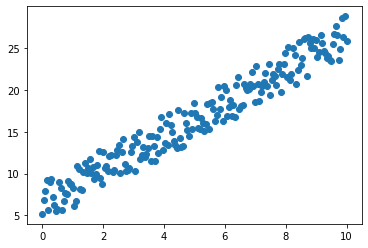

In [21]:
x = np.linspace(0, 10, 200)
y = 2 * x + 4 + np.random.uniform(0, 5, 200)

plt.scatter(x, y)

In [25]:
a, b = np.polyfit(x, y, deg=1)

In [26]:
y_hat = a * x + b

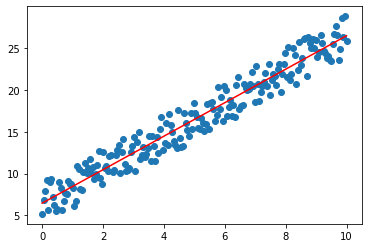

In [28]:
plt.scatter(x, y)
plt.plot(x, y_hat, c='red')

# sklearn

In [30]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x[:, np.newaxis], y)

LinearRegression()

In [41]:
lr.coef_

array([2.00194741])

In [44]:
lr.intercept_

6.459505006572954

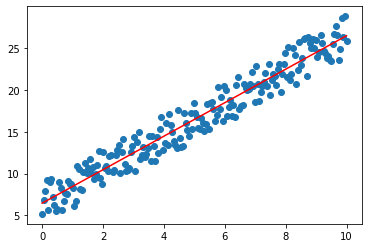

In [50]:
plt.scatter(x, y)
plt.plot(x, lr.predict(x[:, np.newaxis]), color='red')

# Logistic regression

We will use sigmoid

$$\sigma(x) = \frac{1}{1+e^x}.$$

TASK: make two point bubbles and then fit logistic regression model.

In [51]:
from sklearn.datasets import make_blobs

In [63]:
data, group = make_blobs(centers=2)

In [65]:
import pandas as pd

In [67]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [69]:
df['c'] = group

<AxesSubplot:xlabel='x', ylabel='y'>

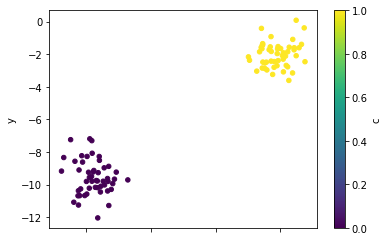

In [73]:
df.plot(kind='scatter', x='x', y='y', c='c', cmap='viridis')

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()

In [82]:
lr.fit(df.drop('c', axis=1), df['c'])

LogisticRegression()

In [83]:
df['pred'] = lr.predict(df.drop('c', axis=1))

In [84]:
df

,x,y,c,pred
0,-4.522634,-9.790725,0,0
1,-5.243778,-8.616822,0,0
2,8.391936,-1.856533,1,1
3,9.274748,-0.925762,1,1
4,-3.962281,-8.273467,0,0
...,...,...,...,...
95,-3.284206,-9.801610,0,0
96,8.914158,-2.490303,1,1
97,-4.374035,-9.131498,0,0
98,-3.323310,-9.623371,0,0


# Tensorflow and GPU acceleration

In [2]:
A = np.random.rand(1000, 1000)

In [5]:
%%timeit

A.dot(A)

20.2 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [9]:
A_tens = tf.constant(A)

In [12]:
%%timeit

tf.multiply(A_tens, A_tens)

399 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
